In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8a772294f14646e598b572136692c07a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='smnMuqwgJBtKb4OkKdiMa-pl7ldzuliq-7K2EAXUJ_cs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_8a772294f14646e598b572136692c07a.get_object(Bucket='sakml-donotdelete-pr-df4yluibxacvuy',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
type(dataset)


pandas.core.frame.DataFrame

In [5]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
x= dataset.iloc[:,:1]

In [7]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [8]:
x= dataset.iloc[:,:-1].values #convert from dataframe to numpy array

In [9]:
x.ndim #mandatory to be in 2 dimesion for Linear Regression

2

In [10]:
y= dataset.iloc[:,1:]

In [11]:
y= dataset.iloc[:,1:].values

In [12]:
from sklearn.model_selection import train_test_split                #previously cros_validation was used in sklearn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
x_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
y_predict=lr.predict(x_test)

In [18]:
y_predict

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [19]:
y_test

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.]])

In [20]:
lr.predict(np.array([[5]]))

array([[73342.97478427]])

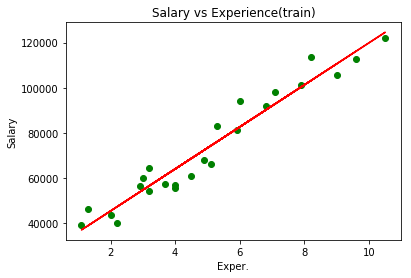

In [21]:
#visualization of train data
plt.scatter(x_train,y_train,color = 'green')
plt.plot(x_train,lr.predict(x_train),color = 'Red')
plt.xlabel("Exper.")
plt.ylabel("Salary")
plt.title("Salary vs Experience(train)")
plt.show()

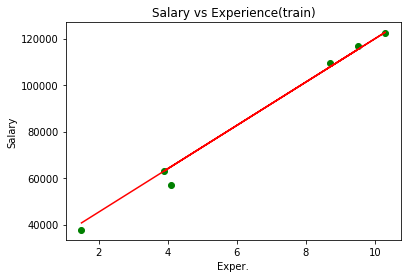

In [22]:
#visualization of train data
plt.scatter(x_test,y_test,color = 'green')
plt.plot(x_test,lr.predict(x_test),color = 'Red')
plt.xlabel("Exper.")
plt.ylabel("Salary")
plt.title("Salary vs Experience(train)")
plt.show()

In [23]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient


In [24]:
wml_credentials={
  "apikey": "YCkzpDJpzRgVYTWOSFplk_nRAY0K0ijsPAGrxIz522dE",
  "iam_apikey_description": "Auto-generated for key 4b258351-1d51-484d-acfe-8f9b17856996",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/9d3622545b8849b1a3695e64438965e8::serviceid:ServiceId-d4cfe772-eeea-4ae3-aa1f-21c5efbb45e4",
  "instance_id": "97e4e2f9-22e1-47d5-aebb-5d33fd2dc2be",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [25]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [26]:
metadata={
    client.repository.ModelMetaNames.DESCRIPTION:'startups data',
    client.repository.ModelMetaNames.AUTHOR_NAME:'Hemant',
    client.repository.ModelMetaNames.NAME:"Multilinear",
    client.repository.ModelMetaNames.FRAMEWORK_NAME:"scikit-learn",
    client.repository.ModelMetaNames.FRAMEWORK_VERSION:"0.22"
    
}

In [28]:
model_details=client.repository.store_model(lr,meta_props=metadata)


In [29]:
published_model_uid=client.repository.get_model_uid(model_details)

In [30]:
published_model_uid

'b7b68d0a-f9d8-42eb-997e-ae6c43ec4b5f'

In [31]:
created_deployment=client.deployments.create(published_model_uid,name="MLR")



#######################################################################################

Synchronous deployment creation for uid: 'b7b68d0a-f9d8-42eb-997e-ae6c43ec4b5f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='34f2cb63-9a95-4bbe-9393-0e208efedc02'
------------------------------------------------------------------------------------------------




In [32]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/97e4e2f9-22e1-47d5-aebb-5d33fd2dc2be/deployments/34f2cb63-9a95-4bbe-9393-0e208efedc02/online'

In [33]:
client.deployments.list()

------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME  TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
34f2cb63-9a95-4bbe-9393-0e208efedc02  MLR   online  DEPLOY_SUCCESS  2020-07-16T05:54:40.949Z  scikit-learn-0.20  model
------------------------------------  ----  ------  --------------  ------------------------  -----------------  -------------
